In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mplsoccer.pitch import Pitch, VerticalPitch

In [4]:
path0 = 'data/events_England.json'
path1 = 'data/events_Spain.json'
path2 = 'data/events_Italy.json'
path3 = 'data/events_France.json'
path4 = 'data/events_Germany.json'
path5 = 'data/events_World_Cup.json'
path6 = 'data/events_European_Championship.json'

In [5]:
import json
with open(path0) as f:
    data = json.load(f)

In [6]:
train = pd.DataFrame(data)

In [7]:
with open(path1) as f:
    data1 = json.load(f)
train1 = pd.DataFrame(data1)

In [8]:
train = pd.concat([train, train1], join='inner', ignore_index=True)

In [9]:
with open(path2) as f:
    data2 = json.load(f)
train2 = pd.DataFrame(data2)
train = pd.concat([train, train2], join='inner', ignore_index=True)

In [10]:
with open(path3) as f:
    data3 = json.load(f)
train3 = pd.DataFrame(data3)
train = pd.concat([train, train3], join='inner', ignore_index=True)

In [11]:
with open(path4) as f:
    data4 = json.load(f)
train4 = pd.DataFrame(data4)
train = pd.concat([train, train4], join='inner', ignore_index=True)

In [12]:
train.size

36856740

In [13]:
pd.unique(train['subEventName'])

array(['Simple pass', 'High pass', 'Head pass', 'Air duel',
       'Ground loose ball duel', 'Smart pass', 'Launch',
       'Ground defending duel', 'Ground attacking duel', 'Foul',
       'Free Kick', 'Cross', 'Shot', 'Reflexes', 'Touch', 'Clearance',
       'Ball out of the field', 'Throw in', 'Goal kick', 'Corner',
       'Goalkeeper leaving line', 'Hand pass', 'Acceleration',
       'Save attempt', '', 'Free kick cross', 'Free kick shot',
       'Hand foul', 'Violent Foul', 'Protest', 'Whistle',
       'Late card foul', 'Out of game foul', 'Penalty', 'Time lost foul',
       'Simulation'], dtype=object)

In [14]:
shots = train[train['subEventName'] == 'Shot']

In [15]:
shots

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
46,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",25413,"[{'y': 41, 'x': 88}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,94.595788,100,177959212
62,10,Shot,"[{'id': 401}, {'id': 201}, {'id': 1211}, {'id'...",26150,"[{'y': 52, 'x': 85}, {'y': 100, 'x': 100}]",2499719,Shot,1631,1H,179.854785,100,177959247
91,10,Shot,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",14763,"[{'y': 52, 'x': 96}, {'y': 100, 'x': 100}]",2499719,Shot,1631,1H,254.745027,100,177959280
128,10,Shot,"[{'id': 401}, {'id': 201}, {'id': 1215}, {'id'...",7868,"[{'y': 33, 'x': 81}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,425.824035,100,177959289
249,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1205}, {'id'...",7868,"[{'y': 30, 'x': 75}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,815.462015,100,177959429
...,...,...,...,...,...,...,...,...,...,...,...,...
3070886,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1206}, {'id'...",15191,"[{'y': 63, 'x': 86}, {'y': 0, 'x': 0}]",2517044,Shot,2451,2H,920.241146,100,251206342
3071053,10,Shot,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",14917,"[{'y': 42, 'x': 91}, {'y': 0, 'x': 0}]",2517044,Shot,2451,2H,1552.626343,100,251206491
3071093,10,Shot,"[{'id': 1901}, {'id': 402}, {'id': 1214}, {'id...",134708,"[{'y': 38, 'x': 70}, {'y': 0, 'x': 0}]",2517044,Shot,2451,2H,1711.659947,100,251206517
3071367,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",284469,"[{'y': 30, 'x': 91}, {'y': 0, 'x': 0}]",2517044,Shot,2451,2H,2725.373600,100,251206776


In [16]:
shots_model = pd.DataFrame(columns=["Goal","X","Y"], dtype=object)

In [20]:
with open('data/players.json') as f:
    play = json.load(f)
players = pd.DataFrame(play)

In [21]:
for i,shot in shots.iterrows():
    
    
    shots_model.at[i,'Header'] = 0
    for tag in shot['tags']:
        if tag['id'] == 403:
            shots_model.at[i,'Header'] = 1
    
    
    #take distance from center of goal at y = 50, x position of goal is always 100
    shots_model.at[i,'X'] = 100-shot['positions'][0]['x']
    shots_model.at[i,'Y'] = shot['positions'][0]['y']
    shots_model.at[i,'C'] = abs(shot['positions'][0]['y'] - 50)
        
    #distance in meters
        
    x = shots_model.at[i,'X']* 105/100
    y = shots_model.at[i,'C']* 65/100
    shots_model.at[i,'Distance'] = np.sqrt(x**2 + y**2)
        
    angle = np.arctan(7.32 * x / (x**2 + y**2 - (7.32/2)**2))
        
    if angle < 0:
        angle = np.pi + angle
        
    shots_model.at[i,'Angle'] = angle
        
    #goal check
    shots_model.at[i,'Goal'] = 0
    shots_model.at[i,'Counter Attack'] = 0
    shots_model.at[i, 'Blocked'] = 0
    shots_model.at[i, 'Right Foot'] = 0
    shots_model.at[i,'wyId'] = shot['playerId']
    
    if shot['matchPeriod'] == '1H':
        shots_model.at[i, 'First Half'] = 1
    
    else:
        shots_model.at[i,'First Half'] = 0
        
    for tags in shot['tags']:
        if tags['id'] == 101:
            shots_model.at[i,'Goal'] = 1
            
        if tags['id'] == 1901:
            shots_model.at[i, 'Counter Attack'] = 1
        
        if tags['id'] == 2101:
            shots_model.at[i, 'Blocked'] = 1
        
        if tags['id'] == 402:
            shots_model.at[i, 'Right Foot'] = 1


In [22]:
shots_model['angle_degrees'] = shots_model['Angle'] * 180 / np.pi

shots_model = shots_model.merge(players, left_on = 'wyId' , right_on = 'wyId')

for i,shot in shots_model.iterrows():
    shots_model.at[i, 'strong foot'] = 0
    
    if shot['Right Foot'] == 1:
        if shot['foot'] == 'right':
            shots_model.at[i, 'strong foot'] = 1
    
    elif shot['Right Foot'] == 0:
        if shot['foot'] == 'left':
            shots_model.at[i, 'strong foot'] = 1

In [40]:
shots_goal = shots_model[shots_model['Goal']==1]
shots_miss = shots_model[shots_model['Goal']==0]

0

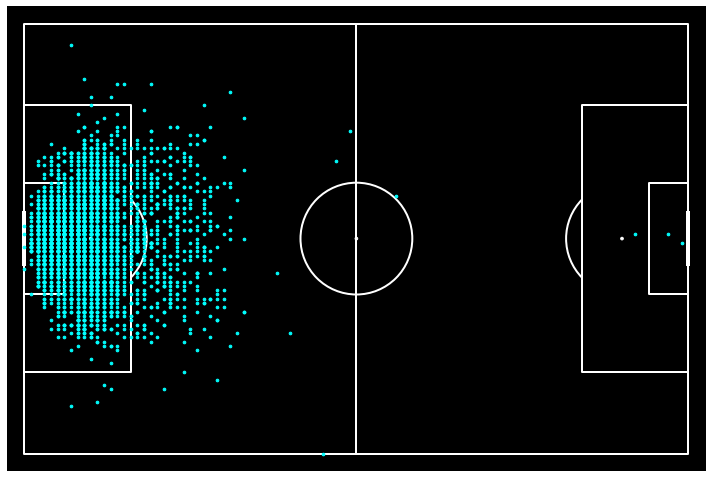

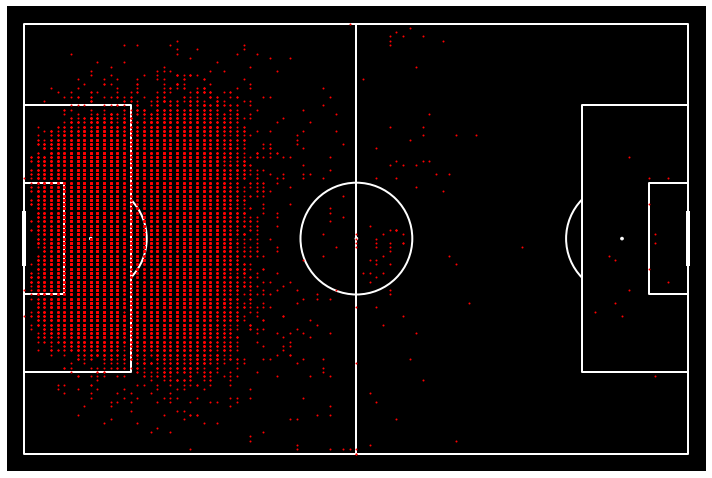

In [47]:
pitch = Pitch(pitch_color ='black', line_color = 'white', stripe=False,pitch_type='wyscout')

fig,ax = pitch.draw(figsize=(10,8))

xpos = shots_goal['X']
ypos = shots_goal['Y']

xpos2 = shots_miss['X']
ypos2 = shots_miss['Y']


sc1 = pitch.scatter(xpos, ypos,
                    # size varies between 100 and 1900 (points squared)
                    s=7,
                      # give the markers a charcoal border
                    c='cyan',  # no facecolor for the markers
                    
                    # for other markers types see: https://matplotlib.org/api/markers_api.html
                    marker='o',ax=ax )




pitch2 = VerticalPitch(pitch_color ='white', line_color = 'grey', stripe=False,pitch_type='wyscout')

fig,ax = pitch.draw(figsize=(10,8))

sc2 = pitch.scatter(xpos2, ypos2,
                    # size varies between 100 and 1900 (points squared)
                    s=1,
                      # give the markers a charcoal border
                    c='red',  # no facecolor for the markers
                    
                    # for other markers types see: https://matplotlib.org/api/markers_api.html
                    marker='o',ax=ax )


In [50]:
shots_model.columns.tolist()

['Goal',
 'X',
 'Y',
 'Header',
 'C',
 'Distance',
 'Angle',
 'Counter Attack',
 'Blocked',
 'Right Foot',
 'wyId',
 'First Half',
 'angle_degrees',
 'passportArea',
 'weight',
 'firstName',
 'middleName',
 'lastName',
 'currentTeamId',
 'birthDate',
 'height',
 'role',
 'birthArea',
 'foot',
 'shortName',
 'currentNationalTeamId',
 'strong foot']

In [75]:
shots_model.loc[:, ['Angle', 'angle_degrees', 'First Half']]

,Angle,angle_degrees,First Half
0,0.474451,27.184065,1.0
1,0.519737,29.778736,1.0
2,0.358683,20.551047,0.0
3,0.337590,19.342501,0.0
4,0.357062,20.458134,1.0
...,...,...,...
40453,0.264934,15.179611,1.0
40454,0.234189,13.418065,1.0
40455,0.491234,28.145656,0.0
40456,0.519737,29.778736,1.0


In [139]:
df = shots_model.loc[:, [ 'X', 'Y', 'Distance', 'angle_degrees', 'Right Foot', 'Header', 'Counter Attack', 'Goal', 'First Half']]

In [149]:
df = df.apply(lambda x:x.astype('float'))

In [1]:
f = plt.figure(figsize=(10,5))
sns.heatmap(data=df.corr(),annot=True,fmt=".2f",linewidths=0.3,linecolor="grey",cmap="RdBu_r")
plt.title('Correlation Matirx')

NameError: name 'plt' is not defined

In [241]:
body_part = pd.DataFrame(columns=['Head','Right Foot','Not Right Foot'], dtype=int)

body_part.at[0,'Head']=shots_model.loc[:, ['Header']].value_counts()[1]
body_part.at[0, 'Right Foot'] = shots_model.loc[:, ['Right Foot']].value_counts()[1]
body_part.at[0, 'Not Right Foot'] = shots_model.loc[:, ['Right Foot']].value_counts()[0]-shots_model.loc[:, ['Header']].value_counts()[1]

list(body_part.values[0])

[6517.0, 20619.0, 13322.0]

In [293]:
unique_goal, indices_goal = np.unique(shots_model.loc[:,['Goal']].values, return_counts=True)
unique_half, indices_half = np.unique(shots_model.loc[:, ['First Half']].values, return_counts=True)
unique_ca, indices_ca = np.unique(shots_model.loc[:, ['Counter Attack']].values, return_counts=True)

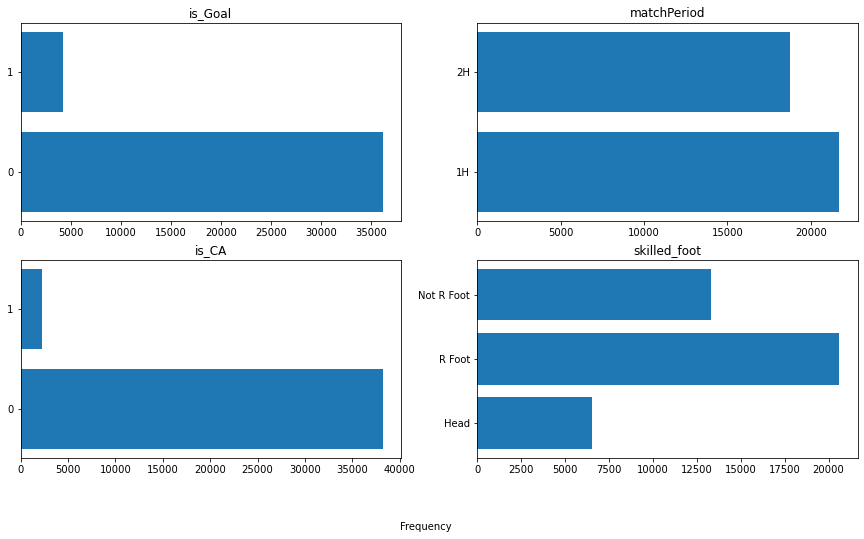

In [300]:
fig, ax = plt.subplots(2,2, figsize=(15,8))

ax[0,0].barh(range(len(unique_goal)), indices_goal)
ax[0,0].set_yticks(range(len(unique_goal)))
ax[0,0].set_yticklabels(['0','1'])
ax[0,0].set_title('is_Goal')

ax[0,1].barh(range(len(unique_half)), indices_half)
ax[0,1].set_yticks(range(len(unique_half)))
ax[0,1].set_yticklabels(['1H','2H'])
ax[0,1].set_title('matchPeriod')

ax[1,0].barh(range(len(unique_ca)), indices_ca)
ax[1,0].set_yticks(range(len(unique_ca)))
ax[1,0].set_yticklabels(['0','1'])
ax[1,0].set_title('is_CA')

ax[1,1].barh(range(3), list(body_part.values[0]))
ax[1,1].set_yticks(range(3))
ax[1,1].set_yticklabels(['Head','R Foot', 'Not R Foot'])
ax[1,1].set_title('skilled_foot')

fig.text(0.5, 0, 'Frequency', ha='center')


plt.show()

In [287]:
unique_angle, indices_angle = np.unique(shots_model.loc[:, ['angle_degrees']].values, return_counts=True)
unique_distance, indices_distance = np.unique(shots_model.loc[:, ['Distance']].values, return_counts=True)
unique_x, indices_x = np.unique(shots_model.loc[:, ['X']].values, return_counts=True)
unique_y, indices_y = np.unique(shots_model.loc[:, ['Y']].values, return_counts=True)


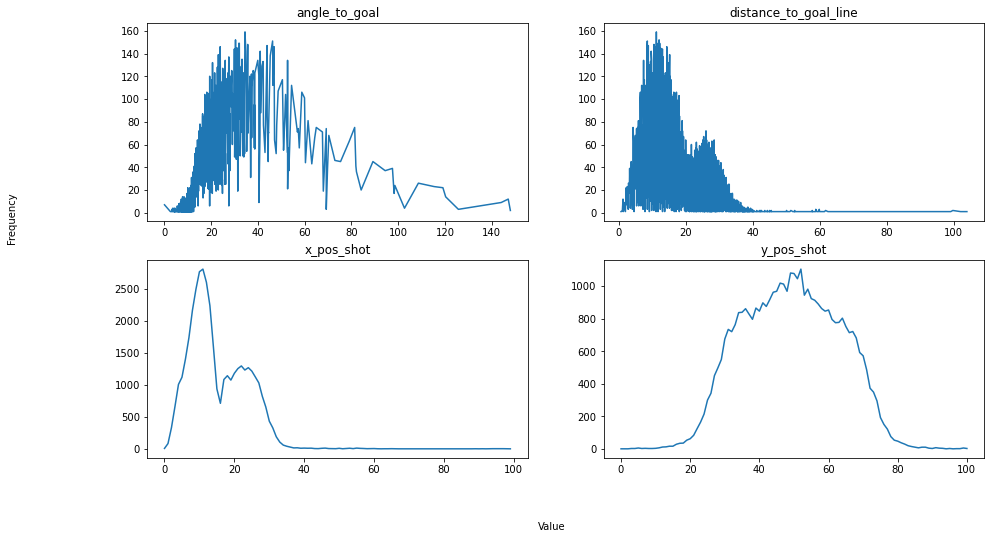

In [289]:
fig, ax = plt.subplots(2,2, figsize=(15,8))

ax[0,0].plot(unique_angle, indices_angle)
ax[0,0].set_title('angle_to_goal')

ax[0,1].plot(unique_distance, indices_distance)
ax[0,1].set_title('distance_to_goal_line')

ax[1,0].plot(unique_x, indices_x)
ax[1,0].set_title('x_pos_shot')

ax[1,1].plot(unique_y, indices_y)
ax[1,1].set_title('y_pos_shot')

fig.text(0.5, 0, 'Value', ha='center')
fig.text(0, 0.5, 'Frequency', ha='center', rotation='vertical')

plt.show()